In [380]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [381]:
#Modifying the pandas display option to allow for the complete display of cell outputs.
pd.set_option('display.max_rows', 500)

# Data Exploration

This assignment is to predict the values of the sale price by applying regression models
*   analysis the correlation of features, choose the features with correlation index larger than 0.2
*   dealing with categorical data
*   dealing with missing data

In [382]:
# DATA: House Price Prediction

data = pd.read_csv('/content/data .csv')
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Use the space below to insert your code for data exploration ...

In [383]:
data.shape

(1460, 81)

In [384]:
#finding the missing values associated with each variable (column) of the dataset.
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [385]:
#Displays all the variable features of the dataset with missing values denoted by boolean True or False
print(data.isnull().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [386]:
data["LotFrontage"].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [387]:
data["Alley"].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [388]:
data["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [389]:
data["MasVnrArea"].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [390]:
data["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [391]:
data["BsmtCond"].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [392]:
data["BsmtExposure"].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [393]:
data["BsmtFinType1"].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [394]:
data["BsmtFinType2"].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [395]:
data["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [396]:
data["FireplaceQu"].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [397]:
data["GarageType"].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [398]:
data["GarageYrBlt"].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [399]:
data["GarageFinish"].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [400]:
data["GarageQual"].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [401]:
data["GarageCond"].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [402]:
data["PoolQC"].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [403]:
data['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [404]:
data['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

Based on inspecting the values of each feature (column) of our Dataset, the features with missing values can be classified as:
a) Categorical : MiscFeature, Fence, PoolQC, GarageCond, GarageQual,GarageFinish, GarageType, FireplaceQu etc. amongst others and,
b) Non - Categorical : GarageYrBuilt, LotFrontage and MasVnrArea.



## Data Cleaning

Pleas see: https://www.bogotobogo.com/python/scikit-learn/scikit_machine_learning_Data_Preprocessing-Missing-Data-Categorical-Data.php

### Categorical Data (removing or replacing them)

In [405]:
#creating a copy of our housing pandas dataframe
df = data

From the Exploratory Analysis of the data that we performed while finding missing values, we realized that of all the column variables that pertain to our dataset, only 19 columns had missing values. Of the 19 columns, three variables: MasVnrArea, GarageYrBlt and LotFrontage are the features which would be non - categorical in type. Of variables which are missing, variables like MiscFeature, Fence, PoolQC and Alley had a lot of missing values (1000+), so we would be removing these variables entirely from the dataset. We would then perform the necessary imputations of our different features. Also, for the categorical variables with missing values, the variables seem to have Nominal Data.

In [406]:
df.shape

(1460, 81)

In [407]:
del df["MiscFeature"]
del df["Fence"]
del df["PoolQC"]
del df["Alley"]

In [408]:
df.shape

(1460, 77)

In [409]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

After deleting the variables with maximum number of missing values, we are left with Columns like LotFrontage, FireplaceQu, GarageType, GarageYrBlt amongst others. The LotFrontage has 259 missing values which is non-categorical in nature. FireplaceQu has 690 missing values which are of categorical in nature. Replacing so many missing values with the most commonly occurring categorical data can heavily skew the dataset values. Thus it would make most sense to delete the FireplaceQu column as well.

In [410]:
del df["FireplaceQu"]

In [411]:
df.shape

(1460, 76)

In [412]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

### Missing Data (finding and replacing)

Now that most of the categorical data with large missing values have been dealt with, we will work on replacing the non-categorical continous data with the mean value of the specific column and replacing the remaining categorical data with the most commonly occuring elements of the specific column variable.

In [413]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)
data_0_LotFrontage = df[df["LotFrontage"]== 0]
data_rem_LotFrontage = df[df["LotFrontage"]!= 0]
df['LotFrontage'] = df['LotFrontage'].replace(0,data_rem_LotFrontage['LotFrontage'].mean())

In [414]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [415]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
data_0_MasVnrArea = df[df["MasVnrArea"]== 0]
data_rem_MasVnrArea = df[df["MasVnrArea"]!= 0]
df['MasVnrArea'] = df['MasVnrArea'].replace(0,data_rem_MasVnrArea['MasVnrArea'].mean())

In [416]:

df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


Now, Most of the remaining data is of categorical in nature, and the number of missing values is relatively small when compared to the magnitude of the dataset, hence we will replace all the missing categorical features with the most commonly occuring value for each feature.

In [417]:
#automatizing the replacement of remaining missing variables.
missing_categories = df.columns[df.isna().any()].tolist()
for category in missing_categories:
  df[category] = df[category].fillna(df[category].mode()[0])


In [418]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [419]:

#gives you the number of missing values irrespective of its column
df.isnull().sum().sum()

0

## Correlation

Some ideas to proceed with feature selection has been inspired from the following article in Medium https://medium.com/@chandradip93/all-about-feature-selec-e6e88e8ccd46

In [420]:
correlation = df.corr()

<ipython-input-420-bbce1ddb6927>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [421]:
relevant_features = correlation['SalePrice'][correlation['SalePrice'] > 0.2] ## most important features
rf_names = relevant_features.index.tolist()

In [423]:
print(relevant_features)

LotFrontage     0.334901
LotArea         0.263843
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.308848
BsmtFinSF1      0.386420
BsmtUnfSF       0.214479
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
BsmtFullBath    0.227122
FullBath        0.560664
HalfBath        0.284108
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.397778
GarageCars      0.640409
GarageArea      0.623431
WoodDeckSF      0.324413
OpenPorchSF     0.315856
SalePrice       1.000000
Name: SalePrice, dtype: float64


## Heatmap

<Axes: >

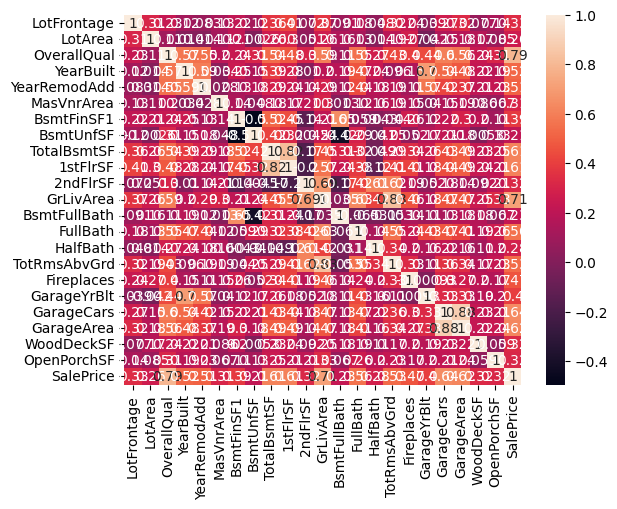

In [424]:
sns.heatmap(correlation.loc[rf_names, rf_names], annot=True)

In [425]:
#creating a copy of our dataframe with the most important features
df2 = df[rf_names]

In [426]:
df2.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,2003,2003,196.000000,706,150,856,856,...,2,1,8,0,2003.0,2,548,0,61,208500
1,80.0,9600,6,1976,1976,254.739425,978,284,1262,1262,...,2,0,6,1,1976.0,2,460,298,0,181500
2,68.0,11250,7,2001,2002,162.000000,486,434,920,920,...,2,1,6,1,2001.0,2,608,0,42,223500
3,60.0,9550,7,1915,1970,254.739425,216,540,756,961,...,1,0,7,1,1998.0,3,642,0,35,140000
4,84.0,14260,8,2000,2000,350.000000,655,490,1145,1145,...,2,1,9,1,2000.0,3,836,192,84,250000


In [427]:
df2.shape

(1460, 23)

In [428]:
df2.isnull().sum()

LotFrontage     0
LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
SalePrice       0
dtype: int64

In [429]:
#finding the correlation of the features in our third dataframe
corr2 = df2.corr()

<Axes: >

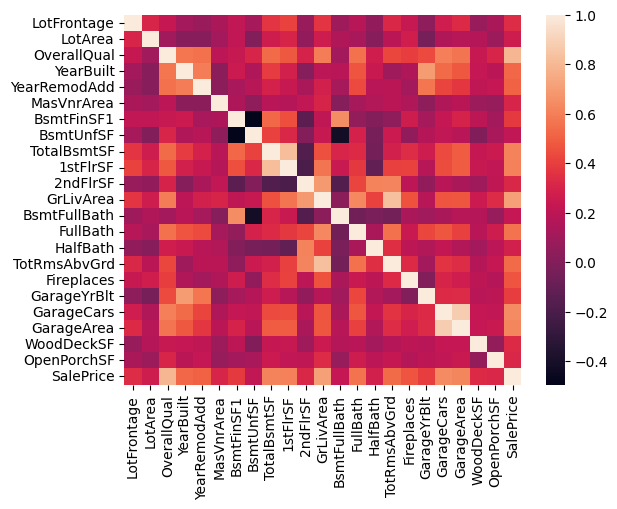

In [430]:
#displaying the intensity and the direction of the correlational indexes on heatmap
sns.heatmap(corr2)

Note: the heat map shown above is the same heatmap that appeared earlier in the sequence of the notebook. Except, the annotations have been removed to make the heatmap visually neater and we have utilized the copy of our dataframe with the most important features to create the heatmap.

In [431]:
df2.dtypes

LotFrontage     float64
LotArea           int64
OverallQual       int64
YearBuilt         int64
YearRemodAdd      int64
MasVnrArea      float64
BsmtFinSF1        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
1stFlrSF          int64
2ndFlrSF          int64
GrLivArea         int64
BsmtFullBath      int64
FullBath          int64
HalfBath          int64
TotRmsAbvGrd      int64
Fireplaces        int64
GarageYrBlt     float64
GarageCars        int64
GarageArea        int64
WoodDeckSF        int64
OpenPorchSF       int64
SalePrice         int64
dtype: object

# Linear Regression

Please answer the following questions:

1. what is linear regression?
2. why we choose the linear regression model?

Solution:

1) Linear Regression is an error-based learning model which assumes a linear relationship of the input variable(s) (features : x) and an output variable (y) which would be an indication of the predicted label associated with the group of features.
Regression as a ML problem solving orientation aims to make meaningful predictions of an output (example : a price of a car, a house) based on the set of parameters which a model has been trained on and learnt utilizing historic data.

2) A linear regression model can be chosen to make meaningful predictions on datasets pertaining to real life problem statements. Linear Regression is best used for predicting values which are continuous and non-categorical in nature.

In [432]:
# data preperation (split ...)
##Splitting data
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
### Seperate the predictors from the target variable
X = df2.drop(["SalePrice"], axis=1)
y = df2["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)



In [433]:
print("Number of data entries in X_train =",X_train.shape[0])
print("Number of data entries in X_test =",X_test.shape[0])
print("Number of data entries in Y_train =",y_train.shape[0])
print("Number of data entries in Y_test =",y_test.shape[0])

Number of data entries in X_train = 876
Number of data entries in X_test = 584
Number of data entries in Y_train = 876
Number of data entries in Y_test = 584


In [434]:
# linear regression
linreg = LinearRegression()

In [435]:
### Train/Fit the model
linreg.fit(X_train, y_train)

LinearRegression()

In [436]:

linreg_pred = linreg.predict(X_test)



In [437]:
test_score = linreg.score(X_test,y_test)
train_score = linreg.score(X_train,y_train)

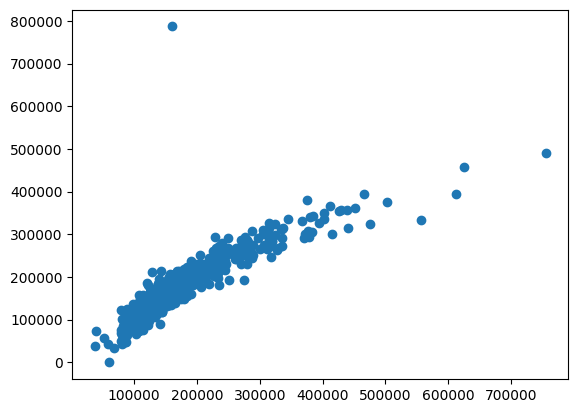

In [438]:
plt.scatter(y_test,linreg_pred)

In [448]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

linreg_score = r2_score(y_true=y_test,y_pred=linreg_pred)
mae= mean_absolute_error(y_true= y_test, y_pred= linreg_pred)
mse = mean_squared_error(y_true= y_test, y_pred= linreg_pred)
print("R**2 Score:" ,linreg_score)
print("Mean Absolute Error Score: ",mae)
print("Mean Squared Error Score:", mse)
print("Testing Score: ",test_score)
print("Training Score: ",train_score)

R**2 Score: 0.7517960395091996
Mean Absolute Error Score:  22176.26257959306
Mean Squared Error Score: 1751473918.092113
Testing Score:  0.7517960395091996
Training Score:  0.8193571632386678



3.   what are scaling techniques?

Solution

3) Scaling techniques which perform feature scaling and normalization of the data are techniques which are used to speed up the process of finding the convergence in a gradient descent of finding optimal weights and biases using a cost function in multiple iterations. Apart from the benefits of fastening the training process and minimizing the magnitude of cost function, scaling techniques allow all the feature variables of a dataset to be in a similar range as others, thus allowing all the variables to be similarly contributing to finding the output value without one feature

Using two scaling method to train the linear regression again.\
Comment on the differences (if any) in the results.

In [440]:
# Using normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [441]:
X_train

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
1243,107.000000,13891,10,2006,2006,254.739425,1386,690,2076,2076,...,1,2,1,7,1,2006.0,3,850,216,229
294,80.000000,9600,6,1953,1953,238.000000,1285,131,1416,1644,...,1,1,0,7,2,1953.0,2,418,110,0
1283,94.000000,9400,6,1971,1971,254.739425,0,912,912,912,...,0,2,2,8,0,2005.0,0,0,128,0
604,88.000000,12803,7,2002,2002,99.000000,922,572,1494,1494,...,1,2,0,6,1,2002.0,2,530,192,36
685,70.049958,5062,7,1984,1984,254.739425,828,180,1190,1190,...,1,2,0,6,1,1984.0,2,577,219,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,24.000000,1920,5,1971,1971,376.000000,471,294,765,765,...,1,1,1,6,0,1971.0,2,440,240,36
1427,60.000000,10930,5,1945,1950,254.739425,580,333,913,1048,...,1,1,1,6,1,1962.0,1,288,0,0
679,70.049958,9945,5,1961,1961,57.000000,827,161,988,988,...,1,1,0,5,0,1963.0,2,572,0,0
862,81.000000,9672,6,1984,1985,254.739425,338,702,1040,1097,...,0,2,0,6,0,1986.0,2,480,0,0


In [449]:
X_train_norm

array([[0.29452055, 0.07984147, 1.        , ..., 0.61151079, 0.2967033 ,
        0.41864717],
       [0.20205479, 0.05263158, 0.55555556, ..., 0.30071942, 0.1510989 ,
        0.        ],
       [0.25      , 0.05136335, 0.55555556, ..., 0.        , 0.17582418,
        0.        ],
       ...,
       [0.16797931, 0.05481928, 0.44444444, ..., 0.41151079, 0.        ,
        0.        ],
       [0.20547945, 0.05308814, 0.55555556, ..., 0.34532374, 0.        ,
        0.        ],
       [0.29452055, 0.07984147, 0.88888889, ..., 0.73381295, 0.07142857,
        0.31078611]])

In [450]:
linreg2 = LinearRegression()

In [451]:
linreg2.fit(X_train_norm,y_train)

LinearRegression()

In [452]:
linreg_pred2 = linreg2.predict(X_test_norm)

In [453]:
r2_score_ = r2_score(y_true=y_test,y_pred=linreg_pred2)
mae2= mean_absolute_error(y_true= y_test, y_pred= linreg_pred2)
mse2 = mean_squared_error(y_true= y_test, y_pred= linreg_pred2)
train_score2 = linreg2.score(X_train_norm,y_train)
test_score2 = linreg2.score(X_test_norm,y_test)
print("R**2 Score:" ,r2_score_)
print("Mean Absolute Error Score: ",mae2)
print("Mean Squared Error Score:", mse2)
print("Testing Score: ",test_score2)
print("Training Score: ",train_score2)

R**2 Score: 0.7517960395091842
Mean Absolute Error Score:  22176.262579593316
Mean Squared Error Score: 1751473918.092222
Testing Score:  0.7517960395091842
Training Score:  0.8193571632386677


In [454]:
# Using Standardization
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()

X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

In [455]:
linreg3 = LinearRegression()
linreg3.fit(X_train_scaled,y_train)



LinearRegression()

In [456]:
linreg_pred3 = linreg3.predict(X_test_scaled)

In [457]:
r2_score1 = r2_score(y_true=y_test,y_pred=linreg_pred3)
mae3 = mean_absolute_error(y_true= y_test, y_pred= linreg_pred3)
mse3 = mean_squared_error(y_true= y_test, y_pred= linreg_pred3)
train_score3 = linreg3.score(X_train_scaled,y_train)
test_score3 = linreg3.score(X_test_scaled,y_test)
print("R**2 Score:" ,r2_score1)
print("Mean Absolute Error Score: ",mae3)
print("Mean Squared Error Score:", mse3)
print("Testing Score: ",test_score3)
print("Training Score: ",train_score3)

R**2 Score: 0.7517960395091843
Mean Absolute Error Score:  22176.262579593298
Mean Squared Error Score: 1751473918.0922215
Testing Score:  0.7517960395091843
Training Score:  0.8193571632386677


After Normalizing and Standardizing the dataset, there seems to be no change in the results procured by model, although using the two scaling processes might have sped up the training time required in linear regression.



# Logistic Regression

Please answer the following questions:

1. what is logistic regression?
2. why we use the logistic regression model?

Please assume: if the sale price is less than 200,000 - label 0, otherwise - label 1.

Solution:

1) Logistic Regression is a Machine Learning model which has applications for classification problems and aims to provide meaningful predictions and classifications for a discrete set of classes, labels or values.

2) Logistic Regression is best utilized for classification problems like labelling if a tumor is benign or malignant, or for classification problems involving more than two classes or ordinal nature of classes.

In [458]:
# data preperation (assign categories, split ...)
from sklearn.linear_model import LogisticRegression
df2.head()
df3 = df2 #copy of our dataset


In [459]:
df3.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,65.0,8450,7,2003,2003,196.000000,706,150,856,856,...,2,1,8,0,2003.0,2,548,0,61,208500
1,80.0,9600,6,1976,1976,254.739425,978,284,1262,1262,...,2,0,6,1,1976.0,2,460,298,0,181500
2,68.0,11250,7,2001,2002,162.000000,486,434,920,920,...,2,1,6,1,2001.0,2,608,0,42,223500
3,60.0,9550,7,1915,1970,254.739425,216,540,756,961,...,1,0,7,1,1998.0,3,642,0,35,140000
4,84.0,14260,8,2000,2000,350.000000,655,490,1145,1145,...,2,1,9,1,2000.0,3,836,192,84,250000


In [460]:
sales_threshold = 200000
df3['Category'] = df3['SalePrice']>=sales_threshold
df3['Category'] = df3['Category'].astype(int)

<ipython-input-460-bf77f0135961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Category'] = df3['SalePrice']>=sales_threshold
<ipython-input-460-bf77f0135961>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Category'] = df3['Category'].astype(int)


In [461]:
df3.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Category
0,65.0,8450,7,2003,2003,196.000000,706,150,856,856,...,1,8,0,2003.0,2,548,0,61,208500,1
1,80.0,9600,6,1976,1976,254.739425,978,284,1262,1262,...,0,6,1,1976.0,2,460,298,0,181500,0
2,68.0,11250,7,2001,2002,162.000000,486,434,920,920,...,1,6,1,2001.0,2,608,0,42,223500,1
3,60.0,9550,7,1915,1970,254.739425,216,540,756,961,...,0,7,1,1998.0,3,642,0,35,140000,0
4,84.0,14260,8,2000,2000,350.000000,655,490,1145,1145,...,1,9,1,2000.0,3,836,192,84,250000,1


In [462]:
df3['Category'].unique()

array([1, 0])

In [463]:
# use function LogisticRegression()
# display precition, recall, classification_report
X_1 = df3.drop(["Category"], axis=1)
y_1 = df3["Category"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, test_size=0.4)

In [464]:
print("Number of data entries in X_train =",X_train1.shape[0])
print("Number of data entries in X_test =",X_test1.shape[0])
print("Number of data entries in Y_train =",y_train1.shape[0])
print("Number of data entries in Y_test =",y_test1.shape[0])

Number of data entries in X_train = 876
Number of data entries in X_test = 584
Number of data entries in Y_train = 876
Number of data entries in Y_test = 584


In [465]:
logreg = LogisticRegression()

In [466]:
#Validate the Model
logreg.fit(X_train1,y_train1)
### Predict on the test set
logreg_pred = logreg.predict(X_test1)

### Get performance metrics
logreg_score = metrics.accuracy_score(y_test1, logreg_pred) * 100
logreg_F1 = metrics.f1_score(y_test1, logreg_pred) * 100
logreg_recall = metrics.recall_score(y_test1, logreg_pred) * 100
logreg_precision = metrics.precision_score(y_test1, logreg_pred) * 100

### Print classification report
print("Classification report for {}:\n{}".format(logreg, metrics.classification_report(y_test1, logreg_pred)))
print("Accuracy score:", logreg_score)
print("F1 score:", logreg_F1)
print("Precision:",logreg_precision)
print("Recall score:",logreg_recall)

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       411
           1       0.98      0.99      0.99       173

    accuracy                           0.99       584
   macro avg       0.99      0.99      0.99       584
weighted avg       0.99      0.99      0.99       584

Accuracy score: 99.14383561643835
F1 score: 98.567335243553
Precision: 97.72727272727273
Recall score: 99.42196531791907


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [467]:
#As we were getting a convergence Warning, I would be looking into Logistic Regression with a Scaled Dataset
scaler3 = StandardScaler()
X_train_scaled1 = scaler3.fit_transform(X_train1)
X_test_scaled1 = scaler3.transform(X_test1)

In [468]:
logreg2 = LogisticRegression()

In [469]:
#Validate the Model
logreg2.fit(X_train_scaled1,y_train1)
### Predict on the test set
logreg_pred2 = logreg2.predict(X_test_scaled1)

### Get performance metrics
logreg_score1 = metrics.accuracy_score(y_test1, logreg_pred2) * 100
logreg_F11 = metrics.f1_score(y_test1, logreg_pred2) * 100
logreg_recall1 = metrics.recall_score(y_test1, logreg_pred2) * 100
logreg_precision1 = metrics.precision_score(y_test1, logreg_pred2) * 100

### Print classification report
print("Classification report for {}:\n{}".format(logreg2, metrics.classification_report(y_test1, logreg_pred2)))
print("Accuracy score:", logreg_score1)
print("F1 score:", logreg_F11)
print("Precision:",logreg_precision1)
print("Recall score:",logreg_recall1)

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       411
           1       0.98      0.97      0.97       173

    accuracy                           0.98       584
   macro avg       0.98      0.98      0.98       584
weighted avg       0.98      0.98      0.98       584

Accuracy score: 98.45890410958904
F1 score: 97.3913043478261
Precision: 97.67441860465115
Recall score: 97.10982658959537
